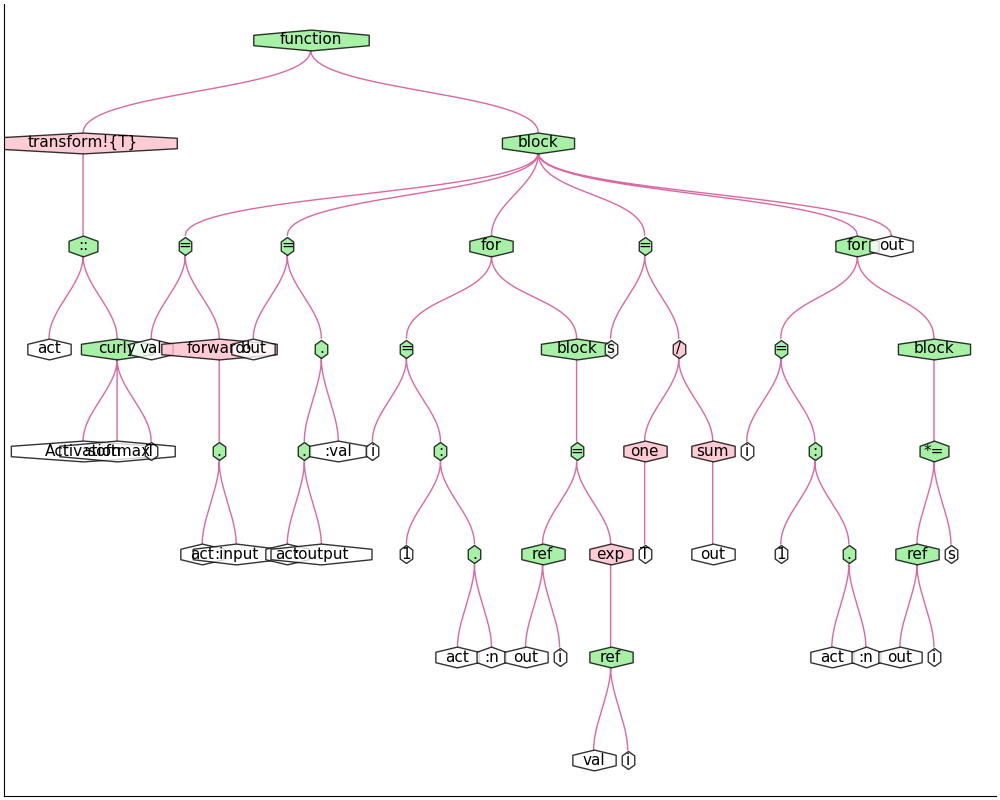

In [2]:
using Plots
using PlotRecipes

#pyplot(ma=0.8,lc=:white,mc=:white,size=(1000,800))
pyplot(ma=0.8,size=(1000,800))

#theme(:dark)

code = :(
function transform!{T}(act::Activation{:softmax,T})
    val = forward!(act.input)
    out = act.output.val
    for i=1:act.n
        out[i] = exp(val[i])
    end
    s = one(T) / sum(out)
    for i=1:act.n
        out[i] *= s
    end
    out
end
)

plot(code, fontsize=11, shorten=0.2, axis_buffer=0.05)


In [3]:
# make a list of a type T and it's supertypes
T = Integer
sups = [T]
sup = T
while sup != Any
    sup = supertype(sup)
    unshift!(sups,sup)
end
sups

4-element Array{DataType,1}:
 Any    
 Number 
 Real   
 Integer

In [4]:
# recursively build a graph of subtypes of T
n = length(sups)
nodes, source, destiny = copy(sups), collect(1:n-1), collect(2:n)
function add_subs!(T, supidx)
    for sub in subtypes(T)
        push!(nodes, sub)
        subidx = length(nodes)
        push!(source, supidx)
        push!(destiny, subidx)
        add_subs!(sub, subidx)
    end
end
add_subs!(T, n)
names = map(string, nodes);

LoadError: [91mMethodError: Cannot `convert` an object of type Type{GeometryTypes.OffsetInteger} to an object of type DataType
This may have arisen from a call to the constructor DataType(...),
since type constructors fall back to convert methods.[39m

In [ ]:
graphplot(source, destiny)